# Exploración Daniel

## Librerías

In [ ]:
import json
import requests
import os
import zipfile
import geopandas as gpd 
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

## Dataset

In [ ]:
df_tabasco=pd.read_csv('/work/Tabasco/conjunto_de_datos_tabasco.csv')
df_tabasco

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,27,Tabasco,0,Total de la entidad Tabasco,0,Total de la entidad,0000,0,2402598,1228927,...,118527,563390,228487,276817,66338,31004,54983,96508,404524,25731
1,27,Tabasco,1,Balancán,0,Total del municipio,0000,0,58524,29282,...,2960,12347,3499,7392,486,227,1907,3607,12387,993
2,27,Tabasco,1,Balancán,1,Total de la localidad urbana,0000,0,13944,7272,...,625,3917,1534,2402,302,133,305,271,2258,75
3,27,Tabasco,1,Balancán,1,Total AGEB urbana,0401,0,1962,1017,...,144,587,244,353,57,15,53,38,330,12
4,27,Tabasco,1,Balancán,1,Balancán,0401,1,54,32,...,9,16,13,13,4,0,*,*,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17781,27,Tabasco,17,Tenosique,1,Tenosique de Pino Suárez,0596,18,15,*,...,*,*,*,*,*,*,*,*,*,*
17782,27,Tabasco,17,Tenosique,1,Tenosique de Pino Suárez,0596,19,5,*,...,*,*,*,*,*,*,*,*,*,*
17783,27,Tabasco,17,Tenosique,1,Tenosique de Pino Suárez,0596,20,8,*,...,*,*,*,*,*,*,*,*,*,*
17784,27,Tabasco,17,Tenosique,1,Tenosique de Pino Suárez,0596,21,2,*,...,*,*,*,*,*,*,*,*,*,*


## Elegir variables

In [ ]:
df_tabasco_limpio=df_tabasco[['ENTIDAD','NOM_ENT','MUN','NOM_MUN','LOC','MZA','NOM_LOC','AGEB','POBTOT','P_12A14_F','P_15A49_F','P_0A2','P_3A5','P12YM_CASA','PCATOLICA','PRO_CRIEVA','POTRAS_REL','PSIN_RELIG','POCUPADA','GRAPROES','VPH_SINCINT','PDER_SS']]
df_tabasco_limpio=df_tabasco_limpio[df_tabasco_limpio.apply(lambda row:all(row != '*'), axis=1)]
series_religiones=df_tabasco_limpio['PCATOLICA'].astype(int)+df_tabasco_limpio['PRO_CRIEVA'].astype(int)+df_tabasco_limpio['POTRAS_REL'].astype(int)
series_14_a_59=df_tabasco_limpio['P_12A14_F'].astype(int)+df_tabasco_limpio['P_15A49_F'].astype(int)
df_tabasco_limpio['P_0A2']=df_tabasco_limpio['P_0A2'].astype(int)+df_tabasco_limpio['P_3A5'].astype(int)
df_tabasco_limpio.insert(13,'Personas c/religion',series_religiones)
df_tabasco_limpio.insert(8,'Mujeres de 12-49',series_14_a_59)
df_tabasco_limpio=df_tabasco_limpio.drop(['PCATOLICA','PRO_CRIEVA','POTRAS_REL','P_12A14_F','P_15A49_F','P_3A5'],axis=1)
df_tabasco_limpio.rename(columns={'PDER_SS':'Personas C/Servicio de Salud','VPH_SINCINT': 'Personas S/Internet','GRAPROES': 'Prom. Grado Escolar','POCUPADA': 'Personas Ocupadas','POBTOT': 'Poblacion Total','P12YM_CASA': 'Personas Casadas','P_0A2': 'Poblacion de 0 a 5','PSIN_RELIG':'Personas s/religion','PROM_HNV':'Promedio de nacidos','GRAP':'Personas Separadas'},inplace =True)
df_tabasco_limpio['Personas Casadas']=df_tabasco_limpio['Personas Casadas'].astype(int)
df_tabasco_limpio['Personas s/religion']=df_tabasco_limpio['Personas s/religion'].astype(int)
df_tabasco_limpio['Personas Ocupadas']=df_tabasco_limpio['Personas Ocupadas'].astype(int)
df_tabasco_limpio['Prom. Grado Escolar']=df_tabasco_limpio['Prom. Grado Escolar'].astype(float)
df_tabasco_limpio['Personas S/Internet']=df_tabasco_limpio['Personas S/Internet'].astype(int)
df_tabasco_limpio['Personas C/Servicio de Salud']=df_tabasco_limpio['Personas C/Servicio de Salud'].astype(int)
df_tabasco_limpio.query("~NOM_LOC.str.startswith('Total')",inplace=True)
df_tabasco_limpio.head(10)

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,MZA,NOM_LOC,AGEB,Mujeres de 12-49,Poblacion Total,Poblacion de 0 a 5,Personas c/religion,Personas Casadas,Personas s/religion,Personas Ocupadas,Prom. Grado Escolar,Personas S/Internet,Personas C/Servicio de Salud
8,27,Tabasco,1,Balancán,1,5,Balancán,0401,38,110,9,97,46,13,60,11.53,16,80
11,27,Tabasco,1,Balancán,1,8,Balancán,0401,37,120,15,112,46,8,67,8.72,27,72
12,27,Tabasco,1,Balancán,1,9,Balancán,0401,24,87,13,76,26,11,40,10.98,18,46
19,27,Tabasco,1,Balancán,1,17,Balancán,0401,24,81,9,77,35,4,27,10.06,18,40
20,27,Tabasco,1,Balancán,1,18,Balancán,0401,15,56,7,51,26,5,27,10.05,14,39
26,27,Tabasco,1,Balancán,1,24,Balancán,0401,36,117,8,110,48,7,52,11.99,11,68
27,27,Tabasco,1,Balancán,1,25,Balancán,0401,35,126,14,123,49,3,56,10.38,26,121
40,27,Tabasco,1,Balancán,1,39,Balancán,0401,0,0,0,0,0,0,0,0.00,0,0
43,27,Tabasco,1,Balancán,1,42,Balancán,0401,0,0,0,0,0,0,0,0.00,0,0
69,27,Tabasco,1,Balancán,1,24,Balancán,0416,32,115,9,101,43,14,56,10.67,15,74


## Dimensión dataset

In [ ]:
df_tabasco_limpio.shape

(5282, 18)

## Información básica

In [ ]:
df_tabasco_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5282 entries, 8 to 17785
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ENTIDAD                       5282 non-null   int64  
 1   NOM_ENT                       5282 non-null   object 
 2   MUN                           5282 non-null   int64  
 3   NOM_MUN                       5282 non-null   object 
 4   LOC                           5282 non-null   int64  
 5   MZA                           5282 non-null   int64  
 6   NOM_LOC                       5282 non-null   object 
 7   AGEB                          5282 non-null   object 
 8   Mujeres de 12-49              5282 non-null   int64  
 9   Poblacion Total               5282 non-null   int64  
 10  Poblacion de 0 a 5            5282 non-null   int64  
 11  Personas c/religion           5282 non-null   int64  
 12  Personas Casadas              5282 non-null   int64  
 13  Persona

## Valores nulos

In [ ]:
df_tabasco_limpio.isnull().sum()
# No hay datos nulos

ENTIDAD                         0
NOM_ENT                         0
MUN                             0
NOM_MUN                         0
LOC                             0
MZA                             0
NOM_LOC                         0
AGEB                            0
Mujeres de 12-49                0
Poblacion Total                 0
Poblacion de 0 a 5              0
Personas c/religion             0
Personas Casadas                0
Personas s/religion             0
Personas Ocupadas               0
Prom. Grado Escolar             0
Personas S/Internet             0
Personas C/Servicio de Salud    0
dtype: int64

## Medidas estadísticas

### Variables cuantitativas

In [ ]:
# Necesitamos primero crear un dataset solo con las variables numéricas
df_num = df_tabasco_limpio.select_dtypes(include=['int64', 'float'])
#df_num

In [ ]:
df_num.describe()

,ENTIDAD,MUN,LOC,MZA,Mujeres de 12-49,Poblacion Total,Poblacion de 0 a 5,Personas c/religion,Personas Casadas,Personas s/religion,Personas Ocupadas,Prom. Grado Escolar,Personas S/Internet,Personas C/Servicio de Salud
count,5282.0,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,27.0,6.654866,40.957213,33.703711,43.285687,141.535214,14.473874,126.576486,60.770920,14.678152,66.783983,7.118266,20.482204,97.958538
std,0.0,4.498855,66.904840,101.722586,69.531145,227.344011,24.651346,206.798839,100.132638,27.352437,111.113297,4.904536,39.637094,156.020491
min,27.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.0,4.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.0,4.000000,1.000000,17.000000,30.000000,98.000000,10.000000,87.000000,41.000000,7.000000,44.000000,9.180000,12.000000,66.000000
75%,27.0,10.000000,65.000000,30.000000,56.000000,181.000000,18.000000,160.000000,77.000000,19.000000,85.000000,10.757500,26.000000,126.000000
max,27.0,17.000000,317.000000,800.000000,982.000000,3258.000000,399.000000,3253.000000,1461.000000,638.000000,1808.000000,16.500000,648.000000,2643.000000


In [ ]:
df_num.mode()

,ENTIDAD,MUN,LOC,MZA,Mujeres de 12-49,Poblacion Total,Poblacion de 0 a 5,Personas c/religion,Personas Casadas,Personas s/religion,Personas Ocupadas,Prom. Grado Escolar,Personas S/Internet,Personas C/Servicio de Salud
0,27,4,1,1,0,0,0,0,0,0,0,0.0,0,0


In [ ]:
df_num.median()

ENTIDAD                         27.00
MUN                              4.00
LOC                              1.00
MZA                             17.00
Mujeres de 12-49                30.00
Poblacion Total                 98.00
Poblacion de 0 a 5              10.00
Personas c/religion             87.00
Personas Casadas                41.00
Personas s/religion              7.00
Personas Ocupadas               44.00
Prom. Grado Escolar              9.18
Personas S/Internet             12.00
Personas C/Servicio de Salud    66.00
dtype: float64

In [ ]:
rango = df_num.max() - df_num.min()
print("Rango")
display(rango)
print("Varianza")
display(df_num.var())
print("Desviación estándar")
display(df_num.std())

Rango


ENTIDAD                            0.0
MUN                               16.0
LOC                              316.0
MZA                              799.0
Mujeres de 12-49                 982.0
Poblacion Total                 3258.0
Poblacion de 0 a 5               399.0
Personas c/religion             3253.0
Personas Casadas                1461.0
Personas s/religion              638.0
Personas Ocupadas               1808.0
Prom. Grado Escolar               16.5
Personas S/Internet              648.0
Personas C/Servicio de Salud    2643.0
dtype: float64

Varianza


ENTIDAD                             0.000000
MUN                                20.239693
LOC                              4476.257590
MZA                             10347.484436
Mujeres de 12-49                 4834.580174
Poblacion Total                 51685.299366
Poblacion de 0 a 5                607.688865
Personas c/religion             42765.759818
Personas Casadas                10026.545127
Personas s/religion               748.155815
Personas Ocupadas               12346.164841
Prom. Grado Escolar                24.054474
Personas S/Internet              1571.099191
Personas C/Servicio de Salud    24342.393471
dtype: float64

Desviación estándar


ENTIDAD                           0.000000
MUN                               4.498855
LOC                              66.904840
MZA                             101.722586
Mujeres de 12-49                 69.531145
Poblacion Total                 227.344011
Poblacion de 0 a 5               24.651346
Personas c/religion             206.798839
Personas Casadas                100.132638
Personas s/religion              27.352437
Personas Ocupadas               111.113297
Prom. Grado Escolar               4.904536
Personas S/Internet              39.637094
Personas C/Servicio de Salud    156.020491
dtype: float64

### Variables cualitativas

In [ ]:
# Necesitamos primero crear un dataset solo con las variables cualitativas
df_cual = df_tabasco_limpio.select_dtypes(include=["object"])
#df_cual

In [ ]:
tabla_frecuencia = pd.DataFrame()
moda_cual = pd.DataFrame()

for i in df_cual.columns:
    tabla_frecuencia[i] = df_cual[i].value_counts()
    moda_cual[i] = [df_cual[i].mode().values[0]]

print("Tabla distribución de frecuencia:")
display(tabla_frecuencia)

print("Moda variables cualitativas: ")
display(moda_cual)

Tabla distribución de frecuencia:


,NOM_ENT,NOM_MUN,NOM_LOC,AGEB
NOM_ENT,,,,
Tabasco,5282,NaN,NaN,NaN


Moda variables cualitativas: 


,NOM_ENT,NOM_MUN,NOM_LOC,AGEB
0,Tabasco,Centro,Villahermosa,0328


## Exploración de los datos

### Variables cuantitativas

Diagramas de cajas y bigotes:


Text(0.5, 1.0, 'Boxplots')

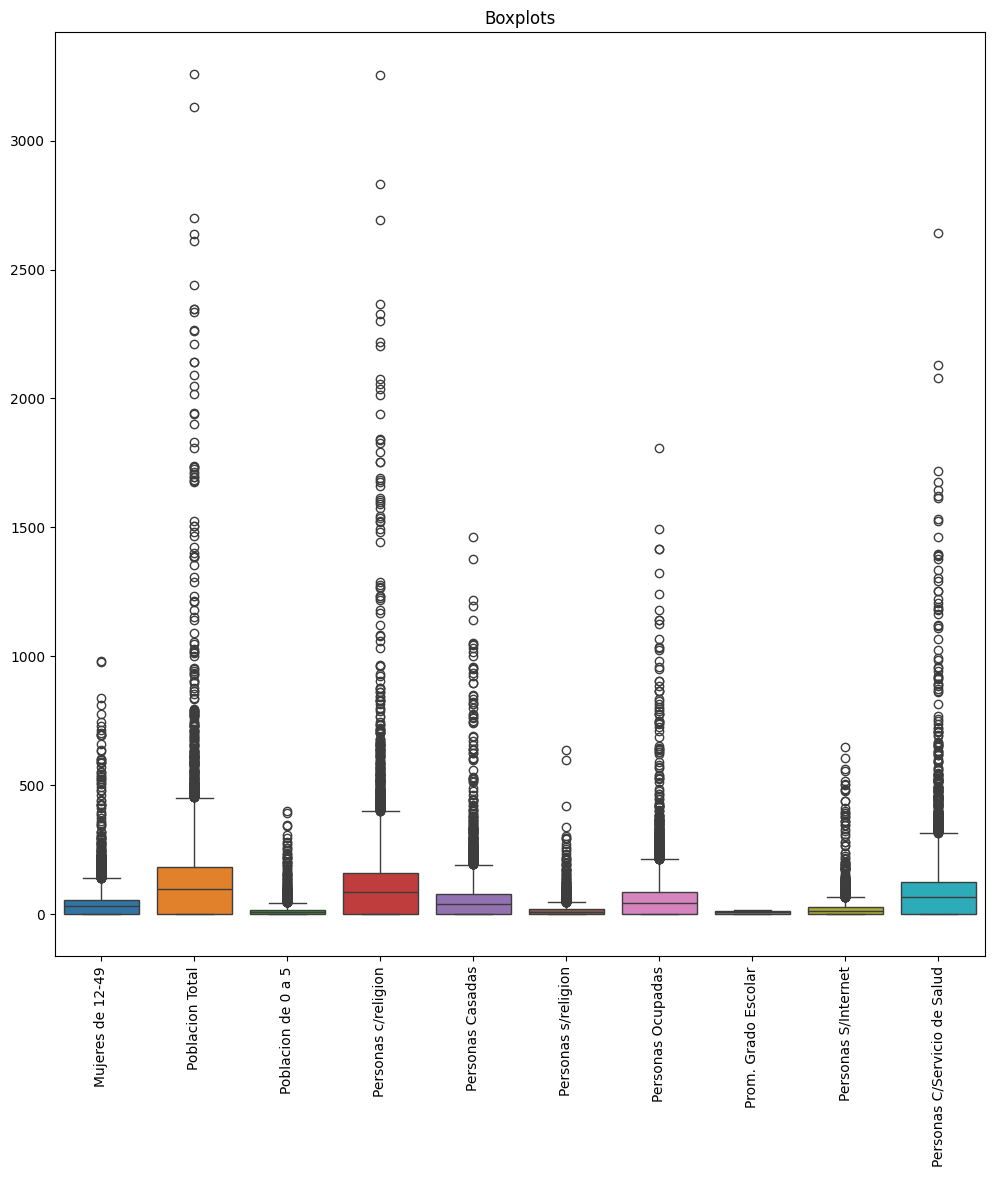

In [ ]:
# Diagramas de cajas y bigotes
print("Diagramas de cajas y bigotes:")
plt.figure(figsize=(12,12))
sns.boxplot(data=df_num.iloc[:,4:])
plt.xticks(rotation=90)
plt.tight_layout
plt.title("Boxplots")

Histogramas:


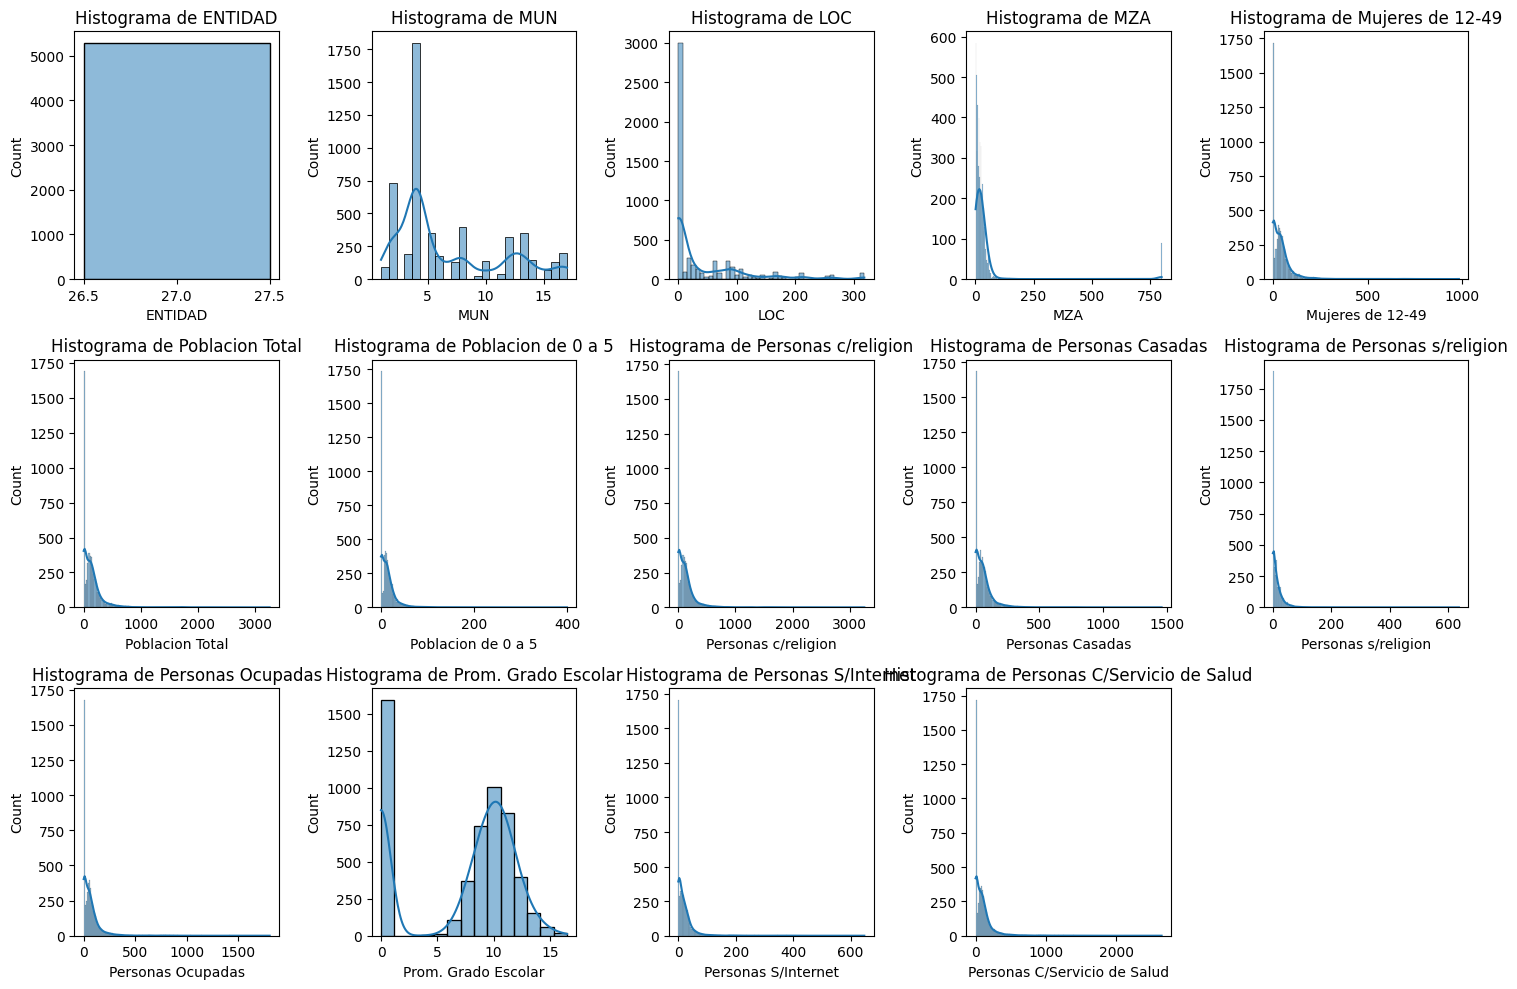

In [ ]:
#Histogramas
print("Histogramas:")
plt.figure(figsize=(15, 10))
num_plots = min(len(df_num.columns), 14)
num_filas = math.ceil(num_plots / 5)
num_columnas = min(num_plots, 5)

for i, columna in enumerate(df_num.columns[:num_plots], 1):
    plt.subplot(num_filas, num_columnas, i)
    sns.histplot(data = df_num, x = columna, kde=True)
    plt.title(f'Histograma de {columna}')

plt.tight_layout()
plt.show()

### Correlación

Heatmap de correlaciónes:


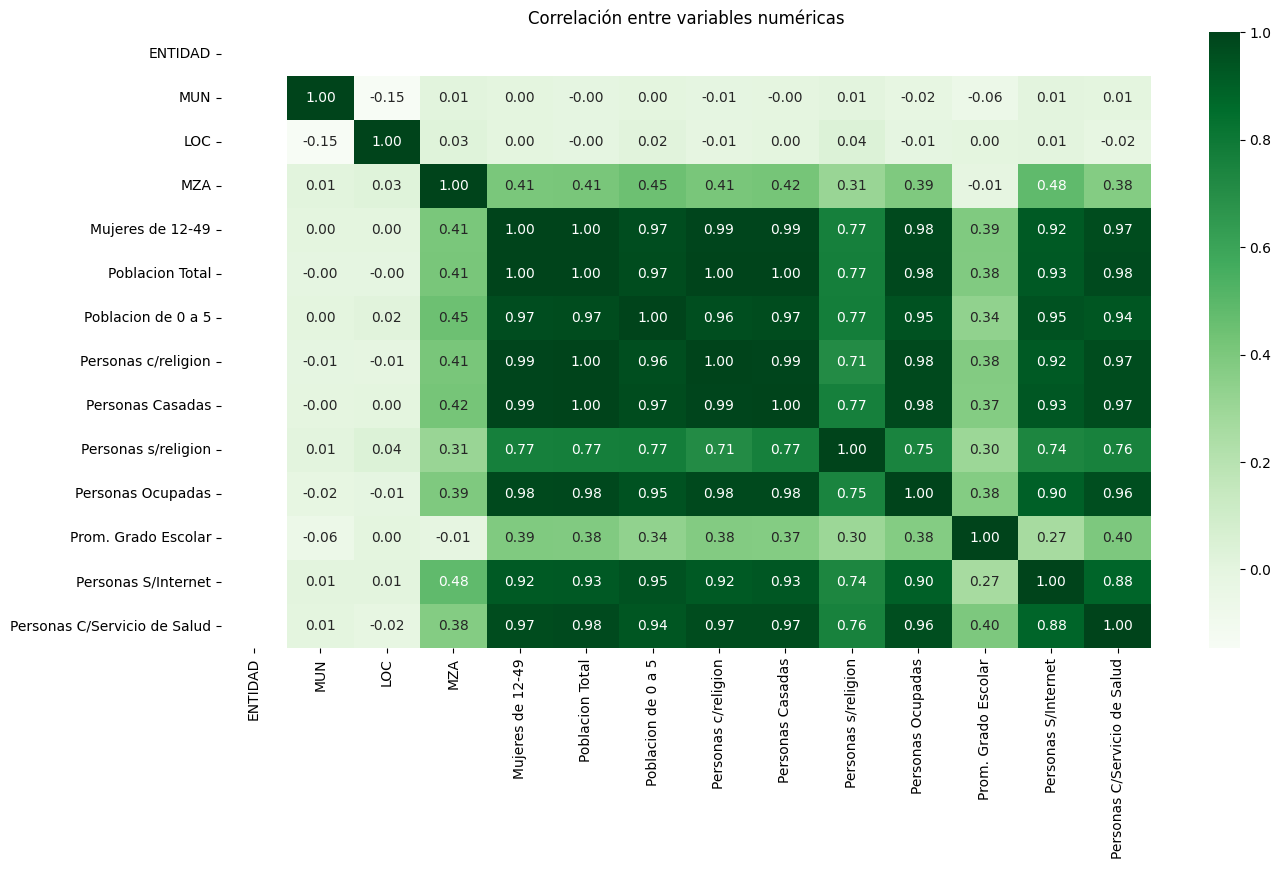

In [ ]:
# Correlación

print("Heatmap de correlaciónes:")
plt.figure(figsize=(15, 8))
sns.heatmap(df_num.corr(), annot=True, cmap="Greens", fmt=".2f")
plt.title("Correlación entre variables numéricas")
plt.show()
#Del mapa de correlaciones solo nos interesa la correlación que existe entre la población... 
#... de 0 a 5 años y las demás variables

### Variables cualitativas

Diagramas de pastel


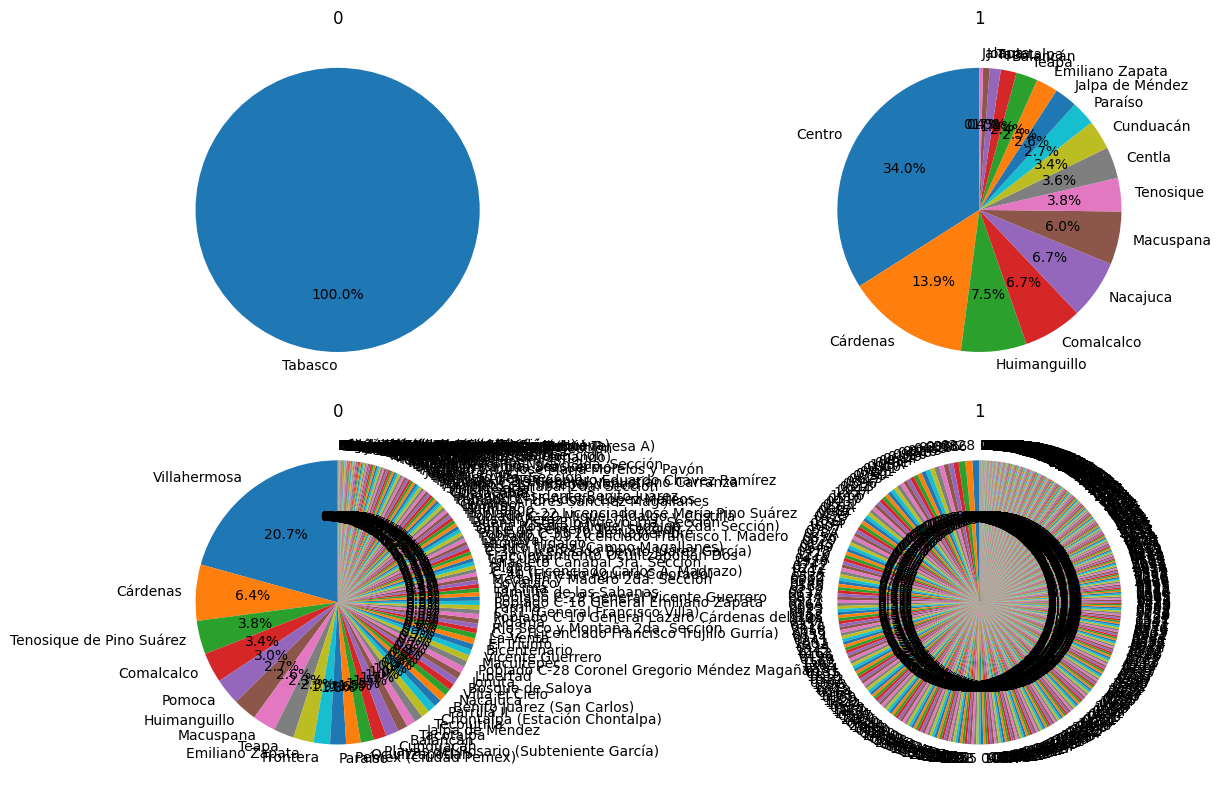

In [ ]:
#Diagramas de pastel
print("Diagramas de pastel")
columnas_cualitativas = df_cual.columns
num_subplots = len(columnas_cualitativas)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i, columna in enumerate(columnas_cualitativas):
    frecuencia_cual = df_cual[columna].value_counts()
    fila = i // 2
    columna = i % 2
    axs[fila, columna].pie(frecuencia_cual, labels=frecuencia_cual.index, autopct='%1.1f%%', startangle=90)
    axs[fila, columna].set_title(columna)

plt.tight_layout()
plt.show()

In [ ]:
#Tablas de contingencia para la variable población de 0 a 5 años
print("Tabla de contingencia de nombre de estado para la población de 0 a 5 años:")
display(pd.crosstab(df_cual.iloc[:, 0], df_num["Poblacion de 0 a 5"], normalize=True))
print("Tabla de contingencia de nombre de municipio para la población de 0 a 5 años:")
display(pd.crosstab(df_cual.iloc[:, 1], df_num["Poblacion de 0 a 5"], normalize=True))
print("Tabla de contingencia de nombre de la localidad para la población de 0 a 5 años:")
display(pd.crosstab(df_cual.iloc[:, 2], df_num["Poblacion de 0 a 5"], normalize=True))
print("Tabla de contingencia de AGEB para la población de 0 a 5 años:")
display(pd.crosstab(df_cual.iloc[:, 3], df_num["Poblacion de 0 a 5"], normalize=True))

Tabla de contingencia de nombre de estado para la población de 0 a 5 años:


Poblacion de 0 a 5,0,3,4,5,6,7,8,9,10,11,...,255,269,275,278,296,306,341,347,394,399
NOM_ENT,,,,,,,,,,,,,,,,,,,,,
Tabasco,0.328095,0.013631,0.006816,0.004733,0.017986,0.032942,0.039947,0.040326,0.037675,0.041462,...,0.000379,0.000189,0.000189,0.000189,0.000189,0.000189,0.000189,0.000189,0.000189,0.000189


Tabla de contingencia de nombre de municipio para la población de 0 a 5 años:


Poblacion de 0 a 5,0,3,4,5,6,7,8,9,10,11,...,255,269,275,278,296,306,341,347,394,399
NOM_MUN,,,,,,,,,,,,,,,,,,,,,
Balancán,0.007952,0.000189,0.000947,0.000379,0.000379,0.001136,0.001893,0.001136,0.000379,0.000568,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Centla,0.006816,0.000000,0.000379,0.000189,0.000379,0.001136,0.000757,0.001704,0.001515,0.001325,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Centro,0.108671,0.005680,0.002651,0.001704,0.005301,0.011359,0.011738,0.013821,0.012306,0.014010,...,0.000189,0.000189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000189
Comalcalco,0.016850,0.000379,0.000379,0.000189,0.000568,0.002651,0.003408,0.004165,0.002461,0.003976,...,0.000000,0.000000,0.000000,0.000189,0.000000,0.000189,0.000189,0.000000,0.000189,0.000000
Cunduacán,0.005490,0.000947,0.000379,0.000189,0.000757,0.000947,0.001515,0.000947,0.001893,0.001515,...,0.000189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cárdenas,0.042976,0.001704,0.000568,0.000757,0.002651,0.005112,0.007573,0.006248,0.006626,0.005490,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Emiliano Zapata,0.014010,0.000757,0.000000,0.000000,0.001136,0.001136,0.001704,0.000947,0.000757,0.000947,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Huimanguillo,0.019879,0.001325,0.000000,0.000568,0.001893,0.002083,0.003786,0.003218,0.003218,0.004544,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jalapa,0.002272,0.000189,0.000000,0.000000,0.000000,0.000000,0.000379,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Tabla de contingencia de nombre de la localidad para la población de 0 a 5 años:


Poblacion de 0 a 5,0,3,4,5,6,7,8,9,10,11,...,255,269,275,278,296,306,341,347,394,399
NOM_LOC,,,,,,,,,,,,,,,,,,,,,
Acachapan y Colmena 1ra. Sección,0.000379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000379,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aldama,0.001893,0.000000,0.000000,0.000000,0.000189,0.000189,0.000189,0.000189,0.000189,0.000379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Anacleto Canabal 1ra. Sección,0.000000,0.000379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Anacleto Canabal 2da. Sección,0.000000,0.000189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000189,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Anacleto Canabal 3ra. Sección,0.000189,0.000189,0.000000,0.000000,0.000000,0.000568,0.000000,0.000189,0.000568,0.000189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tocoal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000189,0.000000,0.000000,0.000568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vicente Guerrero,0.000379,0.000000,0.000000,0.000000,0.000189,0.000189,0.000000,0.000568,0.000189,0.000568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vicente Guerrero 1ra. Sección,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Tabla de contingencia de AGEB para la población de 0 a 5 años:


Poblacion de 0 a 5,0,3,4,5,6,7,8,9,10,11,...,255,269,275,278,296,306,341,347,394,399
AGEB,,,,,,,,,,,,,,,,,,,,,
0010,0.000757,0.000000,0.0,0.000000,0.000000,0.000000,0.000379,0.000947,0.000000,0.000757,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0012,0.000757,0.000000,0.0,0.000000,0.000189,0.000189,0.000000,0.000189,0.000379,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0013,0.000568,0.000000,0.0,0.000000,0.000000,0.000189,0.000000,0.000189,0.000000,0.000189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0016,0.000568,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0018,0.000000,0.000000,0.0,0.000189,0.000000,0.000000,0.000189,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2626,0.000189,0.000000,0.0,0.000000,0.000000,0.000189,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2630,0.000000,0.000000,0.0,0.000000,0.000189,0.000000,0.000000,0.000189,0.000189,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c0848c89-aa3f-4842-a14c-1735a6491904' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>